In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd

In [2]:
data_dir="/content/drive/MyDrive/datasets/brain"

In [3]:
traindata=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [23]:
train_gen = traindata.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="binary",subset="training")


Found 915 images belonging to 2 classes.


In [26]:
val_gen = traindata.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="binary", subset="validation")


Found 227 images belonging to 2 classes.


In [28]:
model = keras.Sequential([layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(150,150,3)),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(32,3,padding="same",activation="relu"),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(128,activation="relu"),
                          layers.Dense(1,activation="sigmoid")])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     5,607,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,612,769 (21.41 MB)

 Trainable params: 5,612,769 (21.41 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [32]:
model.fit(train_gen,epochs=1,validation_data=val_gen,batch_size=32)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.5743 - loss: 1.0363 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 485s 17s/step - accuracy: 0.5765 - loss: 1.0283 - val_accuracy: 0.7093 - val_loss: 0.5473


In [34]:
model.save('/content/drive/MyDrive/brain/brain.h5')

In [35]:
model = load_model('/content/drive/MyDrive/brain/brain.h5')
print("Model Loaded")

Model Loaded


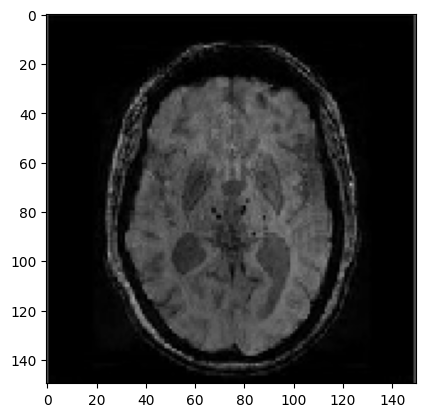

In [42]:
test_image = image.load_img("/content/drive/MyDrive/datasets/brain/no/N1428.jpg",target_size=(150,150))
plt.imshow(test_image)
plt.axis()
plt.show()

In [43]:
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array,axis=0)
img_array/=255

In [44]:
predict_value = model.predict(img_array)
print(predict_value)
if(predict_value>0.5):
  print("Tumor Detected")
else:
  print("No Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.2653986]]
No Tumor Detected
